# itch_midpoint_plot

#### Juan Camilo Henao Londono - 06.02.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

from matplotlib import pyplot as plt
import os

import pickle

import itch_data_tools

In [2]:
def itch_midpoint_plot(ticker, year, month, day, t_step):
    """
    Plot the midpoint price data during a open market day. The data is loaded
    from the mipoint price data results. Function to be used in the function
    midpoint_plot_week.
        :param ticker: string of the abbreviation of the stock to be analized
         (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: string of the month to be analized (i.e '07')
        :param day: string of the day to be analized (i.e '07')
        :param t_step: time step in the data in ms
    """

    function_name = itch_midpoint_plot.__name__
    itch_data_tools.itch_function_header_print_plot(function_name, ticker,
                                                    ticker, year, month, day,
                                                    t_step)

    # Load data
    midpoint = pickle.load(open(''.join((
                '../itch_data_{1}/itch_midpoint_data_1ms/itch_midpoint_data'
                + '_midpoint_{1}{2}{3}_{0}_1ms.pickle').split())
                .format(ticker, year, month, day), 'rb'))
    time = pickle.load(open(''.join((
                '../itch_data_{}/itch_midpoint_data_1ms/itch_midpoint_data'
                + '_time_1ms.pickle').split())
                .format(year), 'rb'))

    # Plotting

    plt.plot(time[::100] / 1000 / 3600, midpoint[::100],
             label=('Day {}'.format(day)))
    plt.legend(loc=0, fontsize=20)

    return None

In [3]:
def itch_midpoint_week_plot(ticker, year, month, days, t_step):
    """
    Plot the midpoint price data during a time period. The data is loaded from
    the mipoint price data results. The time period must be previously knowed
    and set to the function.
        :param ticker: string of the abbreviation of the stock to be analized
         (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: string of the month to be analized (i.e '07')
        :param days: string with the days to be analized
         (i.e ['07', '08', '09'])
        :param t_step: time step in the data in ms
    """

    figure = plt.figure(figsize=(16, 9))

    for day in days:
        itch_midpoint_plot(ticker, year, month, day, t_step)

    plt.title('{}'.format(ticker), fontsize=40)
    plt.xlabel(r'Time $[hour]$', fontsize=25)
    plt.ylabel(r'Price $ [\$] $', fontsize=25)
    plt.tight_layout()
    plt.grid(True)

    # Plotting
    function_name = itch_midpoint_week_plot.__name__
    itch_data_tools.itch_save_plot(function_name, figure, ticker, ticker, year,
                                   month, t_step)

    return None

ITCH data
itch_midpoint_plot
Processing plot for the stock AAPL the 2016.03.07
Time step: 1ms
ITCH data
itch_midpoint_plot
Processing plot for the stock AAPL the 2016.03.08
Time step: 1ms
ITCH data
itch_midpoint_plot
Processing plot for the stock AAPL the 2016.03.09
Time step: 1ms
ITCH data
itch_midpoint_plot
Processing plot for the stock AAPL the 2016.03.10
Time step: 1ms
ITCH data
itch_midpoint_plot
Processing plot for the stock AAPL the 2016.03.11
Time step: 1ms
Plot saved



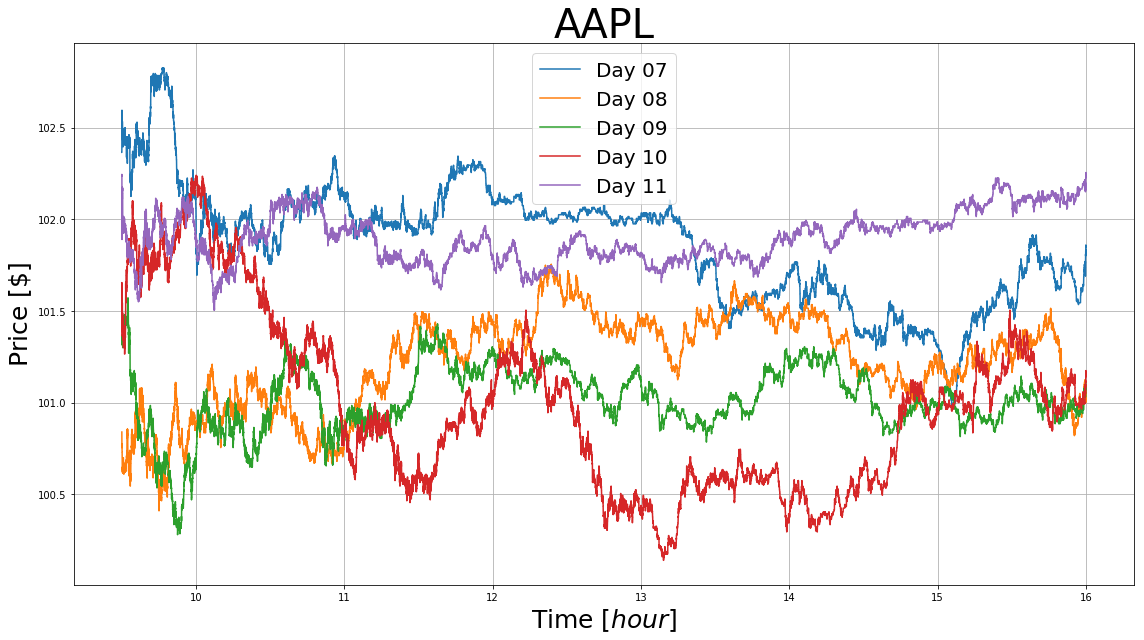

In [4]:
# Test

ticker = 'AAPL'
year = '2016'
month = '03'
days = ['07', '08', '09', '10', '11']
t_step = '1'

itch_midpoint_week_plot(ticker, year, month, days, t_step)